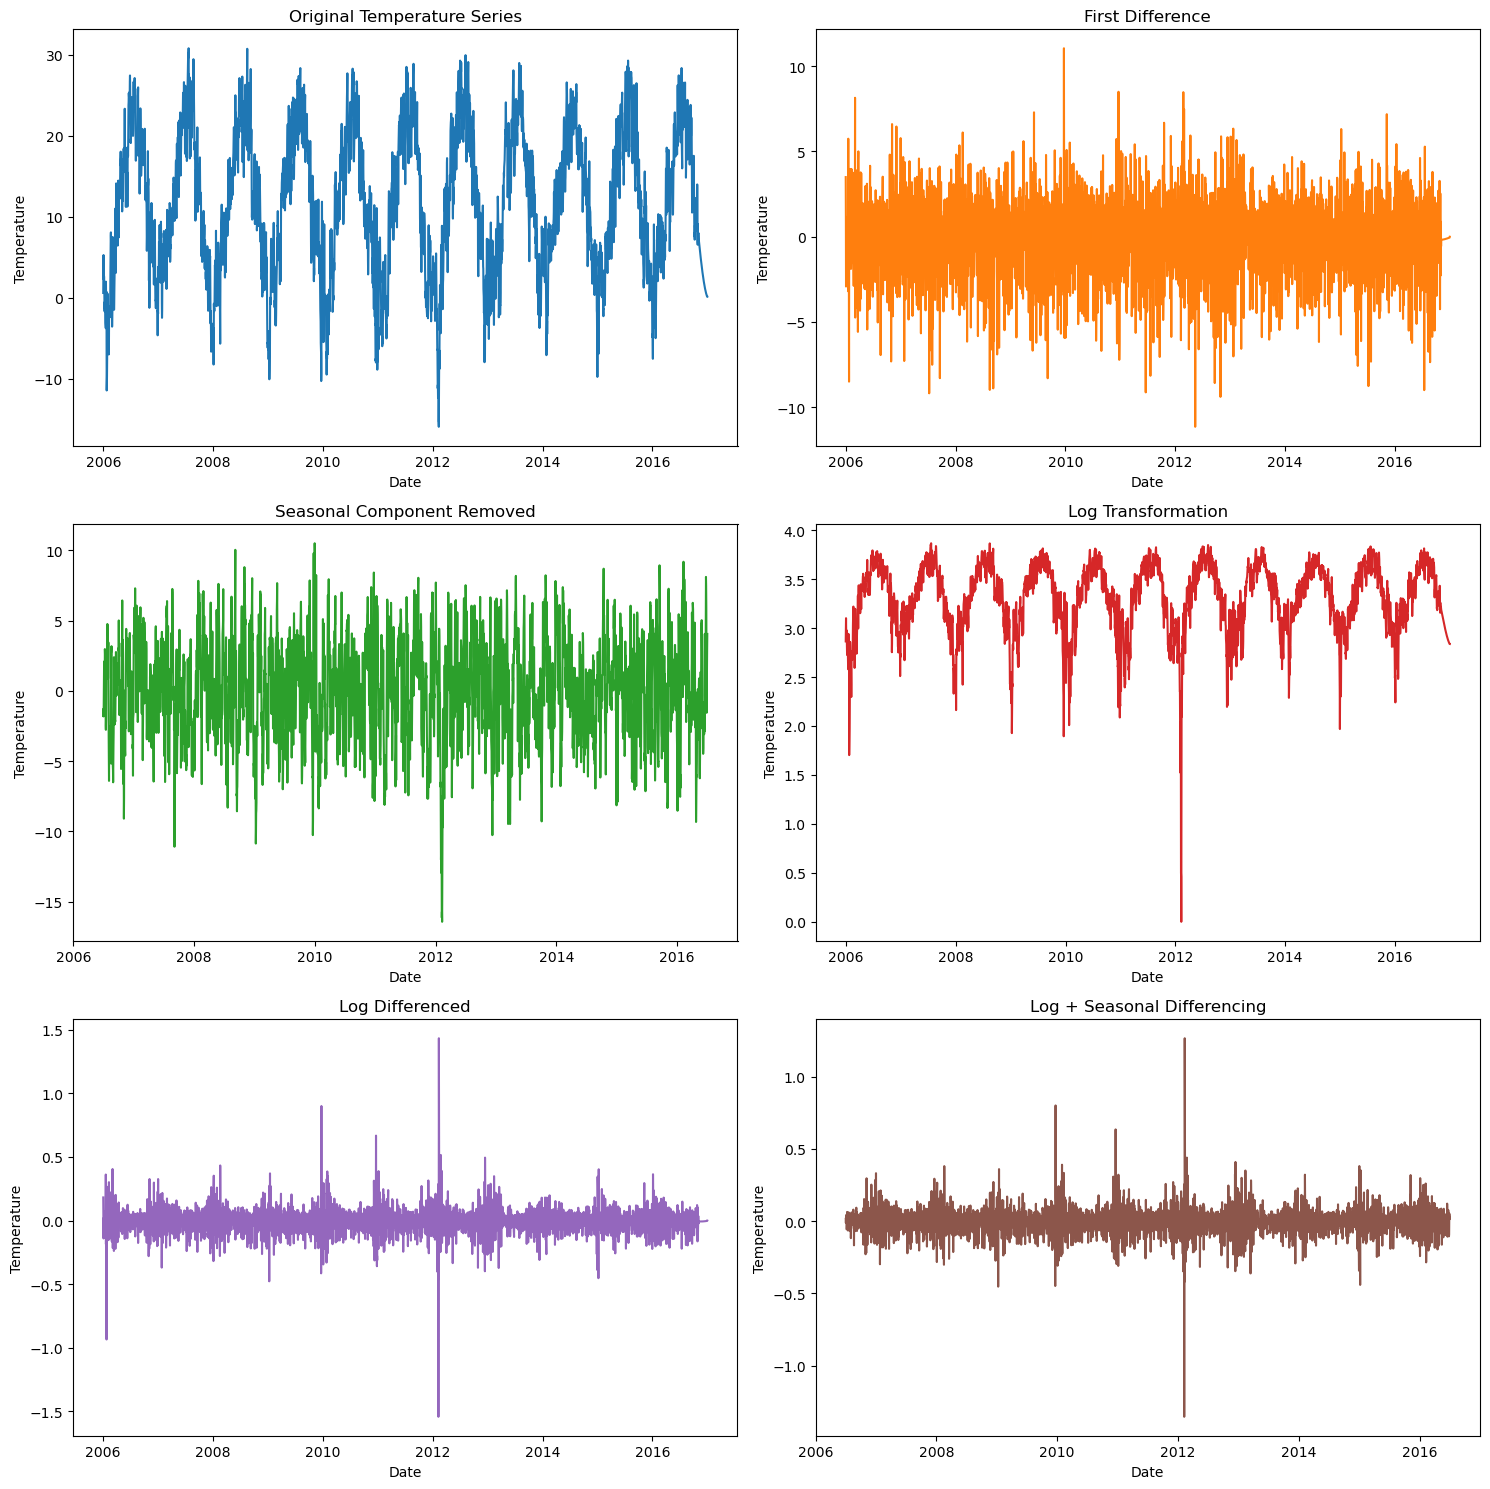

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("weatherHistory.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index('Formatted Date')


daily = df.resample('D').mean(numeric_only=True)

daily['Temp_diff1'] = daily['Temperature (C)'].diff()

decomp1 = seasonal_decompose(daily['Temperature (C)'].dropna(), model='additive', period=365)
daily['Temp_season_adj'] = decomp1.resid

daily['Temp_log'] = np.log1p(daily['Temperature (C)'] - daily['Temperature (C)'].min())

daily['Temp_log_diff'] = daily['Temp_log'].diff()

decomp2 = seasonal_decompose(daily['Temp_log_diff'].dropna(), model='additive', period=365)
daily['Temp_log_season_adj'] = decomp2.resid


fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes[0, 0].plot(daily['Temperature (C)'], color='tab:blue')
axes[0, 0].set_title("Original Temperature Series")

axes[0, 1].plot(daily['Temp_diff1'], color='tab:orange')
axes[0, 1].set_title("First Difference")

axes[1, 0].plot(daily['Temp_season_adj'], color='tab:green')
axes[1, 0].set_title("Seasonal Component Removed")

axes[1, 1].plot(daily['Temp_log'], color='tab:red')
axes[1, 1].set_title("Log Transformation")

axes[2, 0].plot(daily['Temp_log_diff'], color='tab:purple')
axes[2, 0].set_title("Log Differenced")

axes[2, 1].plot(daily['Temp_log_season_adj'], color='tab:brown')
axes[2, 1].set_title("Log + Seasonal Differencing")

for ax in axes.flat:
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature")

plt.tight_layout()
plt.show()
